<a href="https://colab.research.google.com/github/tanupat085/test/blob/master/dashboardDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = pd.read_csv('drive/MyDrive/Online.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
#checkdatatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531283 non-null  object 
 1   StockCode    531283 non-null  object 
 2   Description  530691 non-null  object 
 3   Quantity     531283 non-null  int64  
 4   InvoiceDate  531283 non-null  object 
 5   UnitPrice    531283 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531283 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [19]:
#checkmissingdata
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [20]:
#checkduplication
df.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19050
UnitPrice       1292
CustomerID      4339
Country           38
dtype: int64

In [21]:
#describedata
df.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [30]:
#data preparation
df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['CustomerID'] = df['CustomerID'].astype(str)
df['Month'] = df['Date'].apply(lambda x : x.replace(day=1))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [32]:
#data preparation
monthly_sales = df.groupby(by='Month').agg({'Amount' : 'sum' , 'CustomerID':'nunique' , 'InvoiceNo':'nunique'})
monthly_sales['TicketSize'] = monthly_sales['Amount'] / monthly_sales['InvoiceNo']
monthly_sales.columns = ['Amount','TotalCustomer','TotalTicket','TicketSize']
monthly_sales.reset_index(inplace=True)
monthly_sales.head()

,Month,Amount,TotalCustomer,TotalTicket,TicketSize
0,2010-12-01,823746.140,886,1629,505.675961
1,2011-01-01,691364.560,742,1120,617.289786
2,2011-02-01,523631.890,759,1126,465.037202
3,2011-03-01,717639.360,975,1531,468.738968
4,2011-04-01,537808.621,857,1318,408.049030


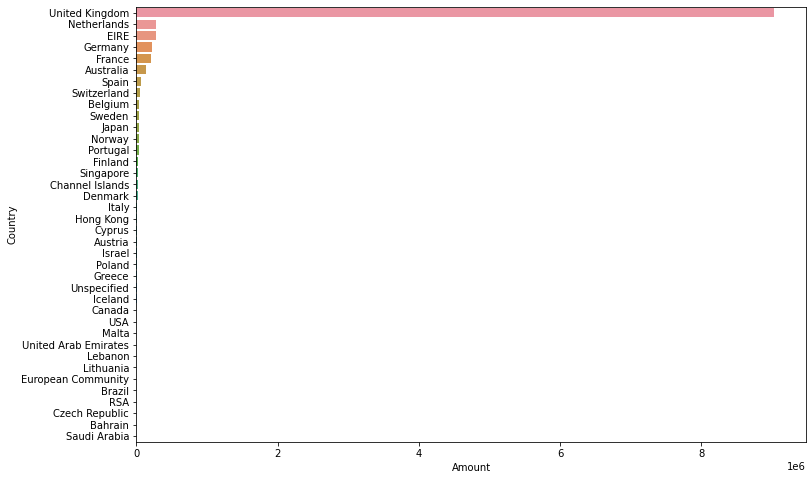

In [49]:
#country capoarison
country_sales = df.groupby(by=['Country'])[['Amount']].sum().reset_index().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='Country',x='Amount',data=country_sales)

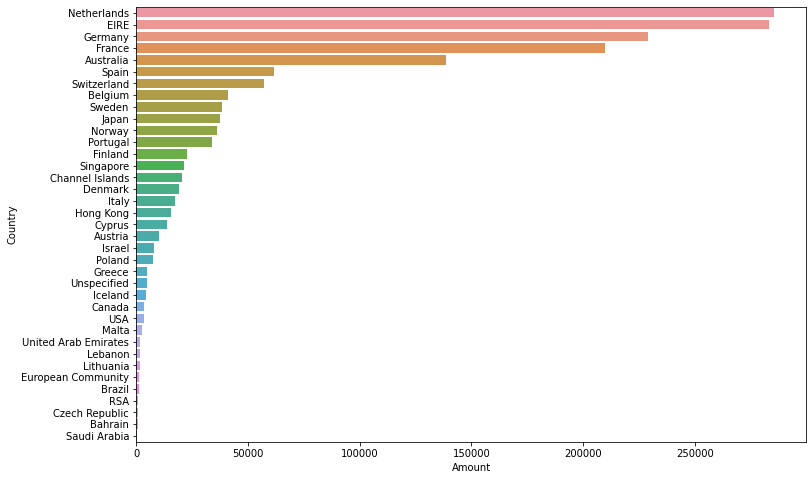

In [37]:
country_sales_no_uk = country_sales[country_sales['Country'] != 'United Kingdom']
plt.figure(figsize=(12,8))
sns.barplot(y='Country',x='Amount',data=country_sales_no_uk)

In [38]:
#data fot scatter plt
product_sales = df.groupby(by=['Description'])[['Amount','Quantity']].sum()

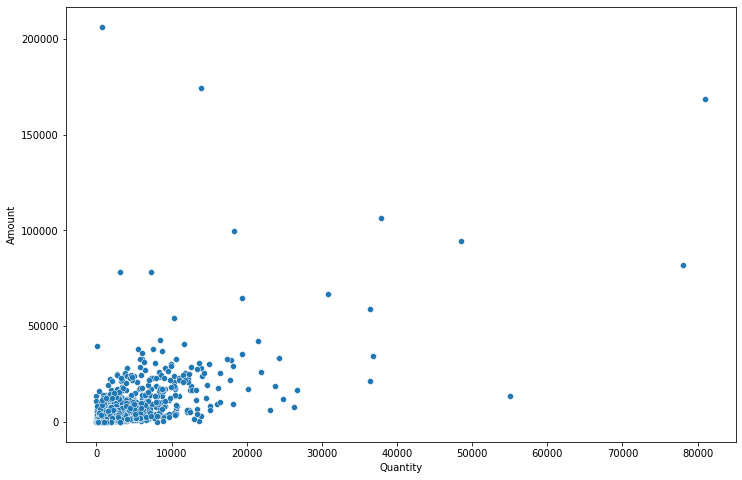

In [39]:
#plot scatter 
plt.figure(figsize=(12,8))
sns.scatterplot(x='Quantity' , y='Amount', data=product_sales)

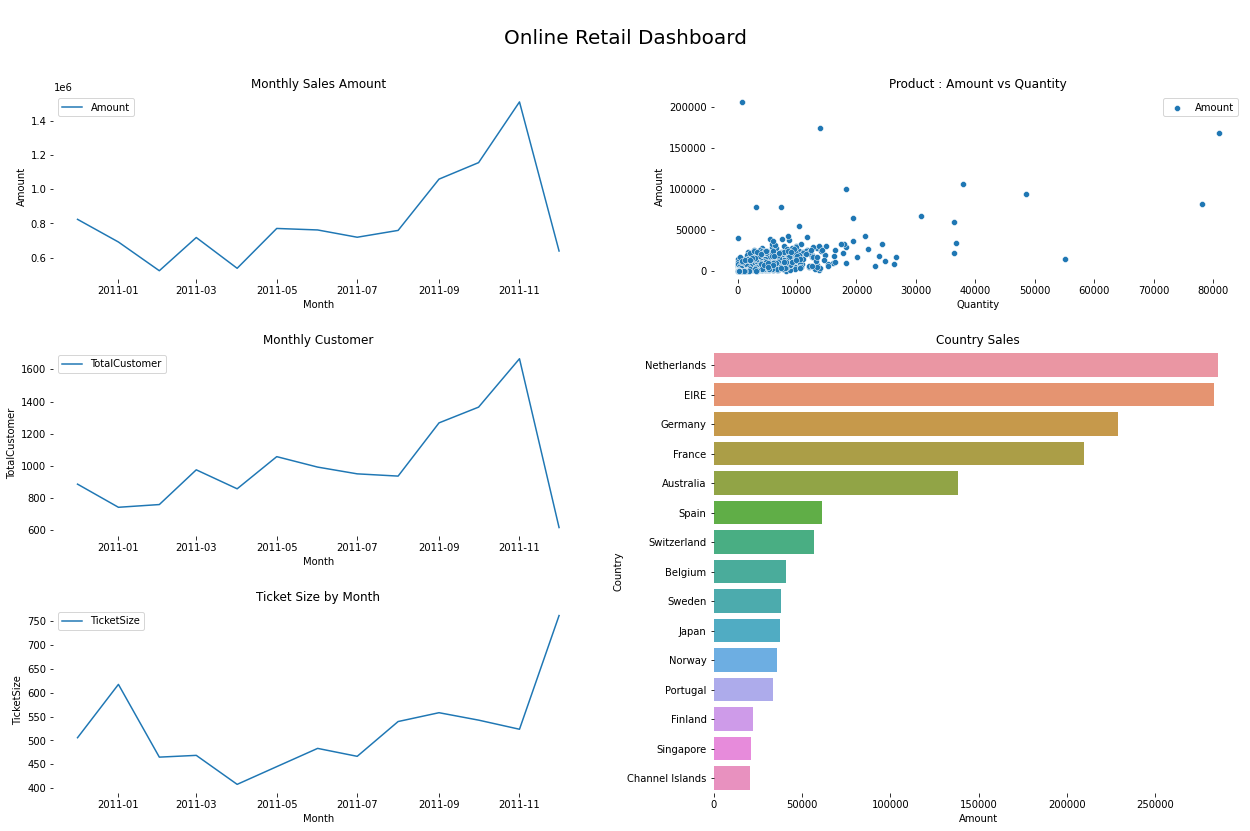

In [43]:
#dashboard
fig,ax = plt.subplots(3,2,figsize=(18,12))
gs = ax[1,1].get_gridspec()
for a in ax[1:,-1]:
  a.remove()
axbig = fig.add_subplot(gs[1:,-1])
sns.lineplot(x='Month', y='Amount',data=monthly_sales , label ='Amount',ax = ax[0,0])
sns.lineplot(x='Month', y='TotalCustomer',data=monthly_sales , label ='TotalCustomer',ax = ax[1,0])
sns.lineplot(x='Month', y='TicketSize',data=monthly_sales , label ='TicketSize',ax = ax[2,0])
sns.scatterplot(x='Quantity', y='Amount',data=product_sales , label ='Amount',ax = ax[0,1])
sns.barplot(y='Country',x='Amount',data=country_sales_no_uk.head(15),ax=axbig)
ax[0,0].set_title('Monthly Sales Amount')
ax[1,0].set_title('Monthly Customer')
ax[2,0].set_title('Ticket Size by Month')
ax[0,1].set_title('Product : Amount vs Quantity')
axbig.set_title('Country Sales')

plt.tight_layout(pad=3.0)
fig.suptitle('\nOnline Retail Dashboard',fontsize=20)
fig.subplots_adjust(top=0.88)
sns.despine(bottom=True,left=True)
plt.show()

In [45]:
%%sh
pip install -q dash
pip install -q dash_core_components
pip install -q dash_bootstrap_components
pip install -q dash_html_components
pip install -q dash_table

In [47]:
%%sh
#get ngrok
curl -O https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.1M  100 13.1M    0     0  9852k      0  0:00:01  0:00:01 --:--:-- 9845k


In [58]:
%%writefile dash_app.py
import dash 
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
import pandas as pd
import plotly.express as px

Overwriting dash_app.py


In [67]:
import dash
import plotly.express as px
import dash_bootstrap_components as dbc
import dash_html_components as html
import dash_core_components as dcc

In [68]:
external_stylesheets = ['https://codeopen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__) # external_stylesheets


##data param
df = pd.read_csv('drive/MyDrive/Online.csv')
df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['CustomerID'] = df['CustomerID'].astype(str)
df['Month'] = df['Date'].apply(lambda x : x.replace(day=1))
monthly_sales = df.groupby(by='Month').agg({'Amount' : 'sum' , 'CustomerID':'nunique' , 'InvoiceNo':'nunique'})
monthly_sales['TicketSize'] = monthly_sales['Amount'] / monthly_sales['InvoiceNo']
monthly_sales.columns = ['Amount','TotalCustomer','TotalTicket','TicketSize']
monthly_sales.reset_index(inplace=True)
country_sales = df.groupby(by=['Country'])[['Amount']].sum().reset_index().sort_values(by='Amount',ascending=True)
country_sales_no_uk = country_sales[country_sales['Country'] != 'United Kingdom']
product_sales = df.groupby(by=['Description'])[['Amount','Quantity']].sum()
##plots
fig1 = px.line(monthly_sales ,x ='Month' ,y='Amount' , height=400 ,title='Amount')
fig2 = px.line(monthly_sales ,x ='Month' ,y='TotalCustomer',height=400,title='Total Customer')
fig3 = px.line(monthly_sales ,x ='Month' ,y='TicketSize' ,height=400,title='Ticket Size')
fig4 = px.scatter(product_sales , x='Quantity' , y='Amount',height=400,title='Product Portfolio')
fig5 = px.bar(country_sales_no_uk , x='Amount' , y='Country' , height = 800  ,orientation='h',title='Country comparison')
##dash app
app = dash.Dash(__name__ , external_stylesheets=[dbc.themes.BOOTSTRAP])
body = html.Div([html.H1("online retail dashboard")
  ,dbc.Row([
    dbc.Col(
      dbc.Row(html.Div(dcc.Graph(figure=fig1)))
        ,width=4),
        dbc.Col(
            dbc.Row(html.Div(dcc.Graph(figure=fig4)))
        )
  ])
  ,dbc.Row([
      dbc.Col([
            dbc.Row(html.Div(dcc.Graph(figure=fig2))),
            dbc.Row(html.Div(dcc.Graph(figure=fig3)))
  ] ,width=4),
  dbc.Col(
      dbc.Row(html.Div(dcc.Graph(figure=fig5)))
  )
])
])
app.layout= html.Div([body])
if __name__ == "__main__":
  app.run_server(debug = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [69]:
get_ipython().system_raw('./ngrok http 8050 &')

In [73]:
%%sh
curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json;print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://94cf9e70a8b4.ngrok.io


In [72]:
!python dash_app.py